In [7]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates.x import XGate, MCXGate
import math
from qiskit import transpile
from qiskit.visualization import plot_histogram

In [8]:
p=17  
n=4
key =""
for cc in range(n):
    key+="0"

In [9]:
def hadamardForAll(n):
    for i in range(1,n):
        qc.h(q[i])  

In [15]:
def OneStep(K,p):
    global qc,q
    angle1=K[2]*math.pi/p
    qc.cry(angle1,q[1],q[0])
    angle1=K[1]*math.pi/p
    qc.cry(angle1,q[2],q[0])
    angle1=K[0]*math.pi/p
    qc.cry(angle1,q[3],q[0])
    angle1 = K[3] * math.pi/p
    qc.ry(angle1, q[0])

In [11]:
def iteration(x):
    hadamardForAll(n)
    for i in range(x):
       OneStep(K,p)  
    qc.barrier()
    hadamardForAll(n)
    qc.barrier()
    for i in range(n):
        qc.measure(q[i],c[i])
# return qc

Start
all_counts[ 34 ] 52
Equal
Measurement Counts: {34: 52}


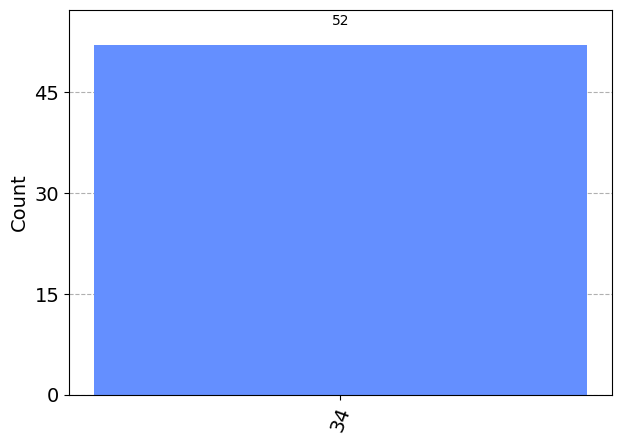

In [14]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider.backends.cairo import FakeCairoV2
from qiskit.visualization import plot_circuit_layout
from qiskit.visualization import plot_histogram
max_number = 129#4*p+1+14
count_p_max = -1
count_not_p_max = -1
print("Start")
shotss=100
n=4
K=[4, 8, 12, 6]


results = []

all_counts = {}
number_of_repetition = 2*17
#for number_of_repetition in range(1,17*6+1):
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
iteration(17)

# Step 2: Select the Backend
backend = FakeCairoV2()  # Create a simulated backend with 3 qubits

# Step 3: Transpile the Circuit
transpiled_circuit = transpile(qc, backend=backend, optimization_level=3)

# Step 4: Execute the Circuit
job = backend.run(transpiled_circuit, shots=shotss)  # Run the circuit with 1024 shots

# Step 5: Retrieve and Print Results
result = job.result()
counts = result.get_counts(transpiled_circuit)
try:
    all_counts[number_of_repetition] = counts[key]
except KeyError:
    all_counts[number_of_repetition] = 0
print("all_counts[",number_of_repetition, "]",all_counts[number_of_repetition])
if (all_counts[number_of_repetition]>20): print("Equal")    
else: print("Error")
   
print(f'Measurement Counts: {all_counts}')
plot_histogram(all_counts)
